# PART II: Optimization
###### Group 7 - Anne Li Cnossen, Odette Roest, Sydney Koppes and Fleur Giesselbach

In [295]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.stats as sts
import statsmodels.graphics.gofplots as sm

## Problem definition: simulation of a tandem line
$I$ multi-server stations with finite buffer slots <br>
$S_i$ number of servers at station $i$ <br>
$C_i$ number of buffer slots at station $i$ <br>
<br>
Arrival process at the fist station follows a $Poisson(\lambda)$ process. <br>
Service times are exponentially distributed with rate $\mu_i$ for all $S_i$ machines in station $i$. <br>
Blocking After Service (BAS) is applied.

### Problem instance

In [296]:
I = 4   

S1 = 1
S2 = 1
S3 = 1
S4 = 1

C1 = 5
C2 = 6
C3 = 6
C4 = 3

### 1. States 
States are given by $$(x_1, x_2, x_3, x_4, \delta_1, \delta_2, \delta_3)$$ where $x_i$ := number of jobs at station $i$, including the server, which is always smaller or equal to $C_i + S_i$ <br>
$\delta_i$ := indicating how many servers are blocked at station $i$, which is always smaller or equal to $S_i$  

### 2. Events
$$\{\alpha, \beta_1, \beta_2, \beta_3, \beta_4\}$$
where $\alpha = \text{arrival of a new job}$ and $\beta_i = \text{service completion of server } i \;\text{with}\; i = 1,2,3,4$ 

### 3. Event lists
The system is completely empty:
$$L((0,0,0,0,0,0,0)) = \{\alpha\}$$

One station is busy, no station is blocked:
$$L((x_1,0,0,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1\} & x_1 \in \{1,2,..,C_1+S_1-1\} \\
    \{\beta_1\} & x_1 = C_1+S_1 \\
\end{cases}
$$
$$L((0,x_2,0,0,0,0,0)) = \{\alpha, \beta_2\} \;\;\;\; x_2 \in \{1,2,..,C_2+S_2\}  $$
$$L((0,0,x_3,0,0,0,0)) = \{\alpha, \beta_3\} \;\;\;\; x_3 \in \{1,2,..,C_3+S_3\}  $$
$$L((0,0,0,x_4,0,0,0)) = \{\alpha, \beta_4\} \;\;\;\; x_4 \in \{1,2,..,C_4+S_4\}  $$

All stations are busy, but no station is blocked:
$$L((x_1,x_2,x_3,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_3, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 \\
    \{\beta_1, \beta_2, \beta_3, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 \\
\end{cases}
$$

At least two stations are busy, but no station is blocked:
$$L((x_1,0,x_3,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_3, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 \\
    \{\beta_1,\beta_3, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 \\
\end{cases}
$$
$$L((x_1,x_2,0,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 \\
    \{\beta_1,\beta_2, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 \\
\end{cases}
$$
$$L((x_1,x_2,x_3,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_3\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 \\
    \{\beta_1,\beta_2, \beta_3\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 \\
\end{cases}
$$
$$L((x_1,0,0,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_4 \in \{1,2,..,C_4+S_4\}\\
    \{\beta_1,\beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_4 \in \{1,2,..,C_4+S_4\}\\
\end{cases}
$$
$$L((x_1,0,x_3,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_3\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_3 \in \{1,2,..,C_3+S_3\}\\
    \{\beta_1, \beta_3\} &  x_1 = C_1+S_1 \;\text{and}\; x_3 \in \{1,2,..,C_3+S_3\}\\
\end{cases}
$$
$$L((x_1,x_2,0,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_2 \in \{1,2,..,C_2+S_2\}\\
    \{\beta_1, \beta_2\} &  x_1 = C_1+S_1 \;\text{and}\; x_2 \in \{1,2,..,C_2+S_2\}\\
\end{cases}
$$
$$L((0,x_2,x_3,x_4,0,0,0)) = \{\alpha, \beta_2, \beta_3, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 $$
$$L((0,0,x_3,x_4,0,0,0)) = \{\alpha, \beta_3, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 $$
$$L((0,x_2,0,x_4,0,0,0)) = \{\alpha, \beta_2, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 $$
$$L((0,x_2,x_3,0,0,0,0)) = \{\alpha, \beta_2, \beta_3\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 $$
The system is completely full and blocked:
$$L((x_1,x_2,x_3,x_4,S_1,S_2,S_3)) = \{\beta_4\} \;\;\;\; x_i = C_i + S_i \;\text{for}\; i = 1,2,3,4  $$
If one or two stations are completely blocked, the event of a completion of a server in the corresponding station is deleted from the event list.  

## CLASSES

In [297]:
class State(object): 
    def __init__(self, _x1 = 0, _x2 = 0, _x3=0, _x4=0, _delta1=0, _delta2=0, _delta3=0):
        self.x1 = _x1
        self.x2 = _x2 
        self.x3 = _x3
        self.x4 = _x4
        self.delta1 = _delta1
        self.delta2 = _delta2
        self.delta3 = _delta3 
    
    def printState(self):
        print('(', self.x1, ', ', self.x2, ', ', self.x3, ', ', self.x4, ', ', self.delta1, ', ', self.delta2, ', ', self.delta3, ')')

class Event(object): 
    def __init__(self, _time = np.inf, _type = ''):
        self.time = _time
        self.type = _type 
    
    def getTime(self): 
        return self.time
    
    def getType(self): 
        return self.type
    
    def printEvent(self): 
        print('(', self.time, ',', self.type, ')', end = ' ')
        

class EventList(object):
    def __init__(self, _elist=[]):
        self.elist = _elist 
    
    def addEvent(self, event): 
        if len(self.elist)==0: 
            self.elist = [event]
        else:
            time_event = event.getTime()
            if time_event > self.elist[-1].getTime():
                self.elist.append(event)
            else: 
                event_start = next(event for event in self.elist if event.getTime() > time_event)
                event_index = self.elist.index(event_start)
                self.elist.insert(event_index, event)
    
    def getFirstEvent(self):
        ''' 
        Gets first item on the list and removes item from the list 
        '''
        first_event = self.elist.pop(0)
        return first_event

    def printEventList(self): 
        for event in self.elist:
            event.printEvent()
        print('')

class CounterSimulation(object):
    def __init__(self, _numServed = 0,_numDeparted = 0, _scoreFunction1 = 0, _scoreFunction2 = 0, _scoreFunction3 = 0, _scoreFunction4 = 0): 
        self.numServed = _numServed 
        self.numDeparted = _numDeparted
        self.scoreFunction1 = _scoreFunction1
        self.scoreFunction2 = _scoreFunction2
        self.scoreFunction3 = _scoreFunction3
        self.scoreFunction4 = _scoreFunction4

    def printNumberServed(self):
        print(self.numServed)
        
    def printNumberDeparted(self):
        print(self.numDeparted)
        

## FUNCTIONS

In [298]:
def randomExponential(random_number, rate): 
    return -np.log(random_number) / rate 

def calculateScoreFunction(mu_rate, x):
    return (x - mu_rate) / (mu_rate * mu_rate )

def arrive(state, counter, eventTime, eventList, mu_rates, arrival_rate, v_arrival, v_departure1): 
    if state.x1 == C1 + S1: 
        interArrivalTime = randomExponential(v_arrival.pop(0), arrival_rate)
        arrivalEvent = Event(eventTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)

    else: 
        counter.numServed += 1 
        state.x1 += 1
    
        non_blocked_server = S1 - state.delta1
        if non_blocked_server > 0: 
            if state.x1 <= S1:
                serviceTime = randomExponential(v_departure1.pop(0), mu_rates[0])
                departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                eventList.addEvent(departureEvent)

                counter.scoreFunction1 += calculateScoreFunction(mu_rates[0], serviceTime)
         
        interArrivalTime = randomExponential(v_arrival.pop(0), arrival_rate)
        arrivalEvent = Event(eventTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)
    
def departure1(state, counter, eventTime, eventList, mu_rates, v_departure1, v_departure2): 
    if state.x2 == C2 + S2: 
        state.delta1 += 1 
    
    else: 
        state.x1 -= 1
        state.x2 += 1
        
        non_blocked_server_2 = S2 - state.delta2
        if non_blocked_server_2 > 0: 
            if state.x2 <= S2: 
                serviceTime = randomExponential(v_departure2.pop(0), mu_rates[1])
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)

                counter.scoreFunction2 += calculateScoreFunction(mu_rates[1], serviceTime)
    
        if state.x1 >= S1:
            serviceTime = randomExponential(v_departure1.pop(0), mu_rates[0])
            departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
            eventList.addEvent(departureEvent)

            counter.scoreFunction1 += calculateScoreFunction(mu_rates[0], serviceTime)       
    
def departure2(state, counter, eventTime, eventList, mu_rates, v_departure1, v_departure2, v_departure3):
    if state.x3 == C3 + S3: 
        state.delta2 += 1 
    
    else: 
        state.x2 -= 1
        state.x3 += 1

        non_blocked_server_3 = S3 - state.delta3
        if non_blocked_server_3 > 0: 
            if state.x3 <= S3: 
                serviceTime = randomExponential(v_departure3.pop(0), mu_rates[2])
                departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
                eventList.addEvent(departureEvent)

                counter.scoreFunction3 += calculateScoreFunction(mu_rates[2], serviceTime)


        if state.delta1 > 0: 
            state.delta1 -= 1
            state.x1 -= 1
            state.x2 += 1
            
            if state.x1 >= S1:  
                serviceTime = randomExponential(v_departure1.pop(0), mu_rates[0])
                departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                eventList.addEvent(departureEvent)

                counter.scoreFunction1 += calculateScoreFunction(mu_rates[0], serviceTime)
        
        if state.x2 >= S2: 
            serviceTime = randomExponential(v_departure2.pop(0), mu_rates[1])
            departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
            eventList.addEvent(departureEvent)

            counter.scoreFunction2 += calculateScoreFunction(mu_rates[1], serviceTime)


def departure3(state, counter, eventTime, eventList, mu_rates, v_departure1, v_departure2, v_departure3, v_departure4):
    if state.x4 == C4 + S4: 
        state.delta3 += 1 
    
    else: 
        state.x3 -= 1
        state.x4 += 1
     
        if state.x4 <= S4: 
            serviceTime = randomExponential(v_departure4.pop(0), mu_rates[3])
            departureEvent = Event(eventTime + serviceTime, 'departureEvent4')
            eventList.addEvent(departureEvent)

            counter.scoreFunction4 += calculateScoreFunction(mu_rates[3], serviceTime)
        
      
        if state.delta2 > 0:
            state.delta2 -= 1
            state.x2 -= 1
            state.x3 += 1
            
            if state.x2 >= S2:  
                serviceTime = randomExponential(v_departure2.pop(0), mu_rates[1])
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)

                counter.scoreFunction2 += calculateScoreFunction(mu_rates[1], serviceTime)
        
            if state.delta1 > 0: 
                state.delta1 -= 1
                state.x1 -= 1
                state.x2 += 1
                
                if state.x1 >= S1: 
                    serviceTime = randomExponential(v_departure1.pop(0), mu_rates[0])
                    departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                    eventList.addEvent(departureEvent)

                    counter.scoreFunction1 += calculateScoreFunction(mu_rates[0], serviceTime)

        if state.x3 >= S3: 
            serviceTime = randomExponential(v_departure3.pop(0), mu_rates[2])
            departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
            eventList.addEvent(departureEvent)

            counter.scoreFunction3 += calculateScoreFunction(mu_rates[2], serviceTime)

def departure4(state, counter, eventTime, eventList, mu_rates, v_departure1, v_departure2, v_departure3, v_departure4):
    counter.numDeparted += 1
    state.x4 -= 1

    if state.delta3 > 0:
        state.delta3 -= 1
        state.x3 -= 1
        state.x4 +=1
        
        if state.x3 >= S3:  
            serviceTime = randomExponential(v_departure3.pop(0), mu_rates[2])
            departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
            eventList.addEvent(departureEvent)

            counter.scoreFunction3 += calculateScoreFunction(mu_rates[2], serviceTime)
    
  
        if state.delta2 > 0: 
            state.delta2 -= 1
            state.x2 -=1
            state.x3 +=1
            
            if state.x2 >= S2: 
                serviceTime = randomExponential(v_departure2.pop(0), mu_rates[1])
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)

                counter.scoreFunction2 += calculateScoreFunction(mu_rates[1], serviceTime)

    
            if state.delta1 > 0:
                state.delta1 -= 1
                state.x1 -= 1
                state.x2 += 1

                if state.x1 >= S1: 
                    serviceTime = randomExponential(v_departure1.pop(0), mu_rates[0])
                    departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                    eventList.addEvent(departureEvent)

                    counter.scoreFunction1 += calculateScoreFunction(mu_rates[0], serviceTime)
        
    if state.x4 >= S4: 
        serviceTime = randomExponential(v_departure4.pop(0), mu_rates[3])
        departureEvent = Event(eventTime + serviceTime, 'departureEvent4')
        eventList.addEvent(departureEvent) 
        
        counter.scoreFunction4 += calculateScoreFunction(mu_rates[3], serviceTime)

## SIMULATION

In [299]:
def simulationRun(numberOfCustomers, mu_rates, arrival_rate, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4):
        currentTime = 0
        counter = CounterSimulation()
        state = State()
        eventList = EventList()

    # initialisation of the simulation 
        interArrivalTime = randomExponential(v_arrival.pop(0), arrival_rate)
        arrivalEvent = Event(currentTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)
        
        while counter.numDeparted < numberOfCustomers:
            event = eventList.getFirstEvent()
            timeEvent = event.getTime()
            typeEvent = event.getType()

            if typeEvent == 'arrivalEvent': 
                arrive(state, counter, timeEvent, eventList, mu_rates, arrival_rate, v_arrival, v_departure1)
            elif typeEvent == 'departureEvent1': 
                departure1(state, counter, timeEvent, eventList, mu_rates, v_departure1, v_departure2)
            elif typeEvent == 'departureEvent2': 
                departure2(state, counter, timeEvent, eventList, mu_rates, v_departure1, v_departure2, v_departure3)
            elif typeEvent == 'departureEvent3': 
                departure3(state, counter, timeEvent, eventList, mu_rates, v_departure1, v_departure2, v_departure3, v_departure4)
            else: 
                departure4(state, counter, timeEvent, eventList, mu_rates, v_departure1, v_departure2, v_departure3, v_departure4)
        
            currentTime = timeEvent
        return counter.numDeparted/ currentTime, counter.numDeparted, counter.scoreFunction1, counter.scoreFunction2, counter.scoreFunction3, counter.scoreFunction4

### n\t-plot

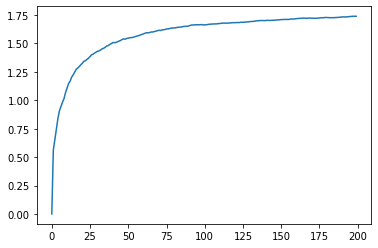

In [304]:
n = 200
m = 100
y_axis = np.zeros(n)
mu_rates =  [2.9, 2.2, 2.2, 2.8]
y_axis = np.zeros((n,m))

for j in range(1, m):
    v_arrival = [rnd.random() for i in range(n + 1000)]
    v_departure1 = [rnd.random() for i in range(n + 100)]
    v_departure2 = [rnd.random() for i in range(n + 100)]
    v_departure3 = [rnd.random() for i in range(n + 100)]
    v_departure4 = [rnd.random() for i in range(n + 100)]
    
    for i in range(1,n):
        v_arrival_temp = [i for i in v_arrival]
        v_dep1_temp = [i for i in v_departure1]
        v_dep2_temp = [i for i in v_departure2]
        v_dep3_temp = [i for i in v_departure3]
        v_dep4_temp = [i for i in v_departure4]

        y_axis[i,j] = simulationRun(i, mu_rates, 2.1, v_arrival_temp, v_dep1_temp, v_dep2_temp, v_dep3_temp, v_dep4_temp)[0]
       

plt.plot(np.mean(y_axis, axis = 1))


In [301]:
def simulationReplication(n_simulations,numberOfCustomers, mu_rates):     

    results = [simulationRun(
        numberOfCustomers, 
        mu_rates,
        arrival_rate = 2.1,
        v_arrival = [rnd.random() for i in range(numberOfCustomers + 1000)], 
        v_departure1 = [rnd.random() for i in range(numberOfCustomers + 100)], 
        v_departure2 = [rnd.random() for i in range(numberOfCustomers + 100)], 
        v_departure3 = [rnd.random() for i in range(numberOfCustomers + 100)], 
        v_departure4 = [rnd.random() for i in range(numberOfCustomers + 100)]        
        ) for i in range(1, n_simulations)]
    return results

In [302]:
mu_rates =  [2.9, 2.2, 2.2, 2.8]
simulationReplication(1000,100, mu_rates)

[(1.688723659163803,
  100,
  -32.92506124742808,
  -36.277324608528836,
  -36.48225929817053,
  -31.53636009047539),
 (1.698513140770363,
  100,
  -33.668410267584406,
  -38.63127672299669,
  -37.35913906190938,
  -31.508091638039954),
 (1.6121581863142818,
  100,
  -35.60395541770004,
  -38.521194043514704,
  -38.17266745657601,
  -31.69447613490108),
 (1.784152882757653,
  100,
  -35.02102368398901,
  -39.42494856432086,
  -39.32445097641717,
  -31.569700195766835),
 (1.7804185877240397,
  100,
  -32.1373588842953,
  -38.98668153052756,
  -37.62306739828866,
  -31.315920363870102),
 (1.7141032017198716,
  100,
  -32.303912290765666,
  -37.66585148158125,
  -37.27473338872653,
  -31.563541018341144),
 (1.5493195650732632,
  100,
  -33.0812863646086,
  -39.223874362162306,
  -36.833345337857935,
  -31.95584785227788),
 (1.581304844089423,
  100,
  -32.32724892255087,
  -39.857645767815974,
  -36.5469502283086,
  -30.485023426313006),
 (1.703369987097925,
  100,
  -33.95942526627128,
 

## OPTIMIZATION
### Initial value theta_0
$$\theta_0 = $$

### Stepsize rule 
$$ \epsilon_n = \frac{1}{n+1} $$

### Descent direction: Based on SFM estimator 

### Stopping rule 


In [355]:
def calculate_energy_costs(mu_rates):
    return (2 / mu_rates[1]) + (1 / mu_rates[2])


def gradient(n, numberOfCustomers, mu_rates, arrival_rate, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4): 
    gradient_estimator = np.zeros((n,4))

    for i in range(1, n): 
        v_arrival_temp = [o for o in v_arrival[i]]
        v_dep1_temp = [o for o in v_departure1[i]]
        v_dep2_temp = [o for o in v_departure2[i]]
        v_dep3_temp = [o for o in v_departure3[i]]
        v_dep4_temp = [o for o in v_departure4[i]]

        simulationOutput = simulationRun(numberOfCustomers, mu_rates, arrival_rate, v_arrival_temp, v_dep1_temp, v_dep2_temp, v_dep3_temp, v_dep4_temp)

        gradient_estimator[i,:] = (simulationOutput[0] + calculate_energy_costs(mu_rates)) * np.array(simulationOutput[2:])
    
    return np.mean(gradient_estimator, axis = 0)

def epsilon_function(n):
    return 1/(n+1)


In [385]:
def stochasticOptimization(m, n, numberOfCustomers, mu_0, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4): 
    v_mu_rates = np.zeros((m,4))
    #v_costFunction = np.zeros(m)
    arrival_rate = 2.1

    v_mu_rates[0,] = mu_0

    for i in range(m-1):
        v_mu_rates[i+1,] = v_mu_rates[i,] - epsilon_function(i) * gradient(n, numberOfCustomers, v_mu_rates[i,], arrival_rate, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4)
    
    return v_mu_rates





In [367]:
np.zeros((2,3))

array([0., 0., 0.])

In [389]:
numberOfCustomers = 100
n = 200
m = 100
v_arrival = [[rnd.random() for i in range(numberOfCustomers + 1000)] for i in range(n)]
v_departure1 = [[rnd.random() for i in range(numberOfCustomers + 100)] for i in range(n)]
v_departure2 = [[rnd.random() for i in range(numberOfCustomers + 100)] for i in range(n)]
v_departure3 = [[rnd.random() for i in range(numberOfCustomers + 100)] for i in range(n)]
v_departure4 = [[rnd.random() for i in range(numberOfCustomers + 100)] for i in range(n)]

stochasticOptimization(m, n, numberOfCustomers, [3.0] * 4, v_arrival, v_departure1, v_departure2, v_departure3, v_departure4)


array([[  3.        ,   3.        ,   3.        ,   3.        ],
       [ 92.63760652,  91.14663956,  89.20342771,  88.07943159],
       [ 93.78178976,  92.3093028 ,  90.39123109,  89.28214218],
       [ 94.53513379,  93.07450843,  91.17255109,  90.07300334],
       [ 95.09557295,  93.64359717,  91.75345071,  90.66087186],
       [ 95.54124326,  94.09606216,  92.21518824,  91.12807673],
       [ 95.91087753,  94.47127765,  92.59801678,  91.51539167],
       [ 96.22646816,  94.7915956 ,  92.92478061,  91.84595238],
       [ 96.50169123,  95.07091343,  93.20968003,  92.13413833],
       [ 96.74562619,  95.3184563 ,  93.46213953,  92.38949188],
       [ 96.96460614,  95.54065824,  93.68873112,  92.61866659],
       [ 97.16322282,  95.74218367,  93.89421863,  92.826485  ],
       [ 97.34491061,  95.92652109,  94.08216445,  93.01655317],
       [ 97.51230494,  96.09634719,  94.25530172,  93.19163754],
       [ 97.66747189,  96.25376032,  94.4157728 ,  93.35389844],
       [ 97.81206103,  96